In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [2]:
"""Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.
"""

'Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining \nhow many dummy variables you have created and RMSE value for each model. Finally which model you will use for \nForecasting.\n'

In [43]:
# load the data set using pandas
data = pd.read_excel("E:\\Forecasting\\Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [45]:
# creating a data frame using pandas
df=pd.DataFrame(data)
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [46]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


<AxesSubplot: >

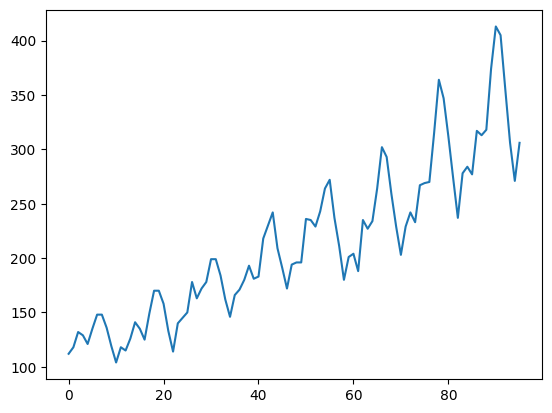

In [47]:
df['Passengers'].plot()

array([[<AxesSubplot: title={'center': 'Month'}>,
        <AxesSubplot: title={'center': 'Passengers'}>]], dtype=object)

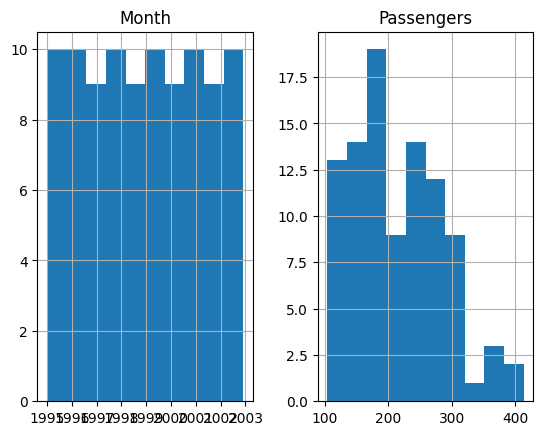

In [48]:
df.hist()

<AxesSubplot: xlabel='Passengers', ylabel='Density'>

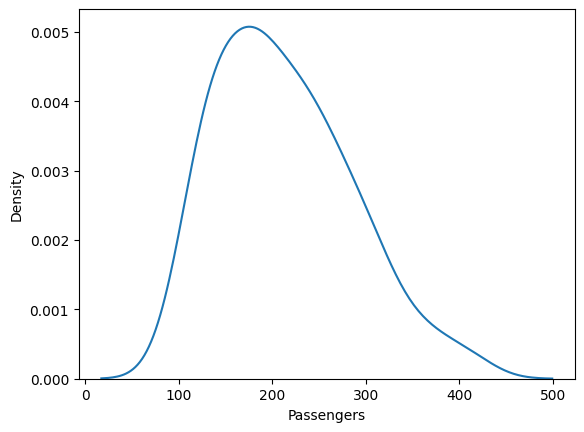

In [49]:
sns.distplot(df['Passengers'], hist=False)

In [50]:
# converting the Month column into actual months name an dsaving them in the new column
df['month'] = df['Month'].dt.strftime('%b')
df.head()

,Month,Passengers,month
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May


In [51]:
dummies  = pd.DataFrame(pd.get_dummies(df['month']))

In [52]:
airlines = pd.concat([df,dummies],axis=1)

In [54]:
airlines.head()

# created a total of 12 dummy columns using the generated month column

,Month,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0


In [55]:
# converting the Month column to actual year
airlines['year']=airlines['Month'].dt.strftime('%y')

In [56]:
# for actually performing forecasting we have to create dummy variable columns ,t2 value column and log values columns
airlines['t'] = np.arange(1,97)
airlines['t_sqr'] = airlines['t']*airlines['t']
airlines['log_passengers'] = np.log(airlines['Passengers'])
airlines.head()

,Month,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,year,t,t_sqr,log_passengers
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,95,1,1,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,95,2,4,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,95,3,9,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,95,4,16,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,95,5,25,4.795791


<AxesSubplot: xlabel='year', ylabel='Passengers'>

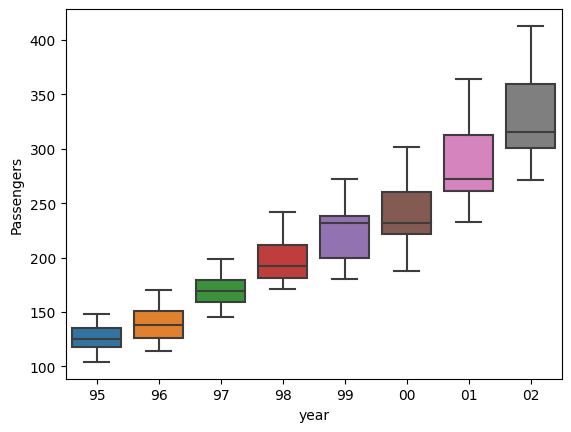

In [16]:
# plotting a boxplot will help us in frequency of data and outlier detection ((yearly passenngers))
sns.boxplot(x="year",y="Passengers",data=airlines)

<AxesSubplot: xlabel='month', ylabel='Passengers'>

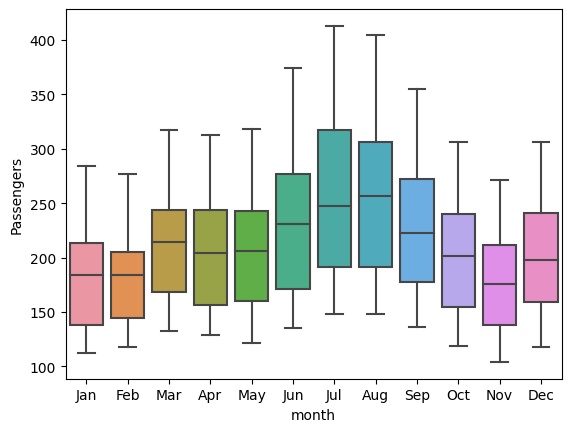

In [59]:
# plotting a boxplot will help us in frequency of data and outlier detection ((monthly passengers))
sns.boxplot(x="month",y="Passengers",data=airlines)

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

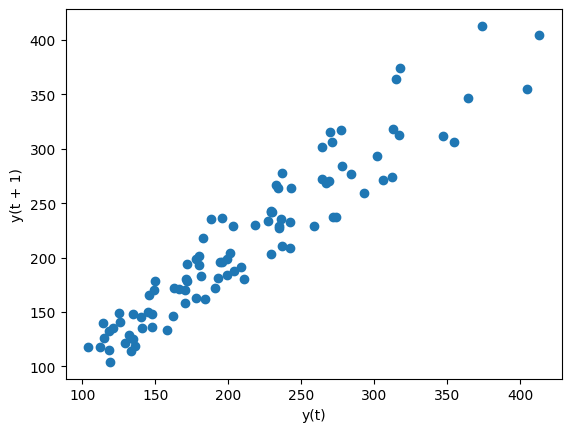

In [60]:
pd.plotting.lag_plot(airlines['Passengers'])

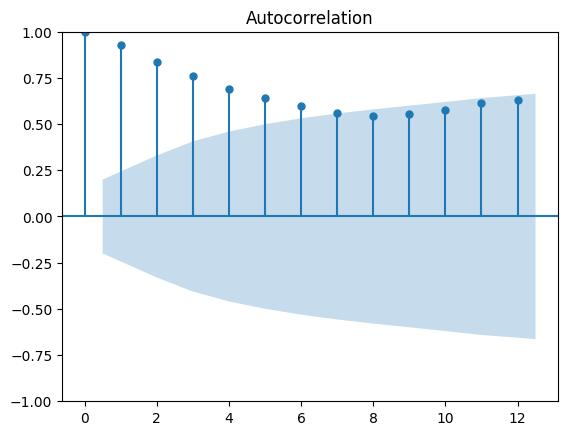

In [61]:
# now its time for time series analysis plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines['Passengers'],lags=12)
plt.show()

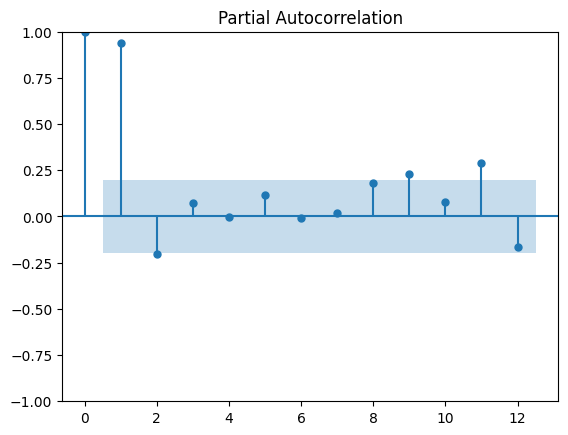

In [20]:
tsa_plots.plot_pacf(airlines['Passengers'],lags=12)
plt.show()

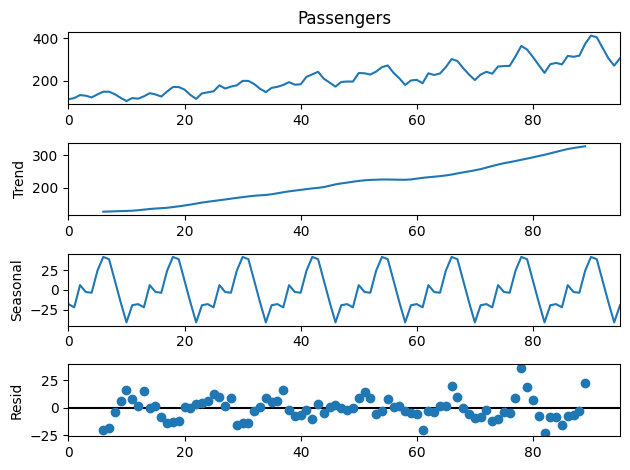

In [62]:
# analyzing the seasonal trends
from statsmodels.tsa.seasonal import seasonal_decompose
ts_decompose = seasonal_decompose(airlines['Passengers'],period = 12)
ts_decompose.plot()
plt.show()

In [63]:
# the seasonal graph actually show us that the data is having additive seasonality
# the trend graph actually show us that the data is having non seasonal seasonality and its gradually increasing

In [64]:
# splitting the data into two parts to make prediction and create forecasting with train data and checking it with the test data
train_data = airlines.head(75)
test_data = airlines.tail(25)

In [65]:
train_data.tail()

,Month,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,year,t,t_sqr,log_passengers
70,2000-11-01,203,Nov,0,0,0,0,0,0,0,0,0,1,0,0,00,71,5041,5.313206
71,2000-12-01,229,Dec,0,0,1,0,0,0,0,0,0,0,0,0,00,72,5184,5.433722
72,2001-01-01,242,Jan,0,0,0,0,1,0,0,0,0,0,0,0,01,73,5329,5.488938
73,2001-02-01,233,Feb,0,0,0,1,0,0,0,0,0,0,0,0,01,74,5476,5.451038
74,2001-03-01,267,Mar,0,0,0,0,0,0,0,1,0,0,0,0,01,75,5625,5.587249


In [66]:
test_data.head()

,Month,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,year,t,t_sqr,log_passengers
71,2000-12-01,229,Dec,0,0,1,0,0,0,0,0,0,0,0,0,00,72,5184,5.433722
72,2001-01-01,242,Jan,0,0,0,0,1,0,0,0,0,0,0,0,01,73,5329,5.488938
73,2001-02-01,233,Feb,0,0,0,1,0,0,0,0,0,0,0,0,01,74,5476,5.451038
74,2001-03-01,267,Mar,0,0,0,0,0,0,0,1,0,0,0,0,01,75,5625,5.587249
75,2001-04-01,269,Apr,1,0,0,0,0,0,0,0,0,0,0,0,01,76,5776,5.594711


# Model based forecasting

### linear model

In [69]:
import statsmodels.formula.api as smf
linear_model = smf.ols('Passengers~t',data = train_data).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_linear))**2))
print('RMSE Linear:',rmse_linear)

RMSE Linear: 51.83809749584509


### Exponential model

In [71]:
exponential_model = smf.ols('log_passengers~t',data = train_data).fit()
pred_exponential = pd.Series(exponential_model.predict(pd.DataFrame(test_data['t'])))
rmse_exponential = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_exponential)))**2))
print('RMSE exponential:',rmse_exponential)

RMSE exponential: 42.77525975019796


### Quadratic model

In [72]:
quadratic_model = smf.ols('Passengers~t+t_sqr',data=train_data).fit()
pred_quadratic =  pd.Series(quadratic_model.predict(pd.DataFrame(test_data[['t','t_sqr']])))
rmse_quadratic = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_quadratic))**2))
print("RMSE Quadratic: ",rmse_quadratic)

RMSE Quadratic:  54.031406456252654


### Additive seasonality

In [73]:
additive_seasonality_model = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_additive_seasonality=  pd.Series(additive_seasonality_model.predict(pd.DataFrame(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmse_additive_seasonality = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_additive_seasonality))**2))
print("RMSE Additive seasonality: ",rmse_additive_seasonality)

RMSE Additive seasonality:  123.02763788084238


### Additive seasonality quadratic

In [74]:
additive_seasonality_qd_model = smf.ols('Passengers~t+t_sqr+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_additive_seasonality_qd =  pd.Series(additive_seasonality_qd_model.predict(pd.DataFrame(test_data[['t','t_sqr','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmse_additive_seasonality_quadratic = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_additive_seasonality_qd))**2))
print("RMSE Additive seasonality quadratic: ",rmse_additive_seasonality_quadratic)

RMSE Additive seasonality quadratic:  36.5362744454732


### Multiplicative seasonalty

In [75]:
mult_sea_model = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_mult_sea =  pd.Series(mult_sea_model.predict(test_data))
rmse_multiplicative_seasonality = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_mult_sea)))**2))
print("RMSE Multiplicative seasonality: ",rmse_multiplicative_seasonality)

RMSE Multiplicative seasonality:  128.16622817596155


### Multiplicative additive seasonality

In [77]:
mult_add_sea_model = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_mult_add_sea =  pd.Series(mult_add_sea_model.predict(test_data))
rmse_multiplicative_add_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_mult_add_sea)))**2))
print("RMSE Multiplicative additive seasonality: ",rmse_multiplicative_add_sea)

RMSE Multiplicative additive seasonality:  11.565825437686447


In [111]:
#make a table containing accuracy score value for each value of k_neighbors
scores={'Forecasting Model':["Linear","Exponential","Quadratic","Additive Seasonality","Additive Seasonality Quadratic","Multiplicative Seasonality","Multiplicative Additive Seasonality"],'RMSE_scores':[rmse_linear,rmse_exponential,rmse_quadratic,rmse_additive_seasonality,rmse_additive_seasonality_quadratic,rmse_multiplicative_seasonality,rmse_multiplicative_add_sea]}
table1=pd.DataFrame(scores)
table1

,Forecasting Model,RMSE_scores
0,Linear,51.838097
1,Exponential,42.775260
2,Quadratic,54.031406
3,Additive Seasonality,123.027638
4,Additive Seasonality Quadratic,36.536274
5,Multiplicative Seasonality,128.166228
6,Multiplicative Additive Seasonality,11.565825


In [79]:
# the model which has the lowest RMSE scores is the best model for forecasting this data
# the model with the lowest scores is Multiplicative Additive Seasonality

# Data driven forecasting

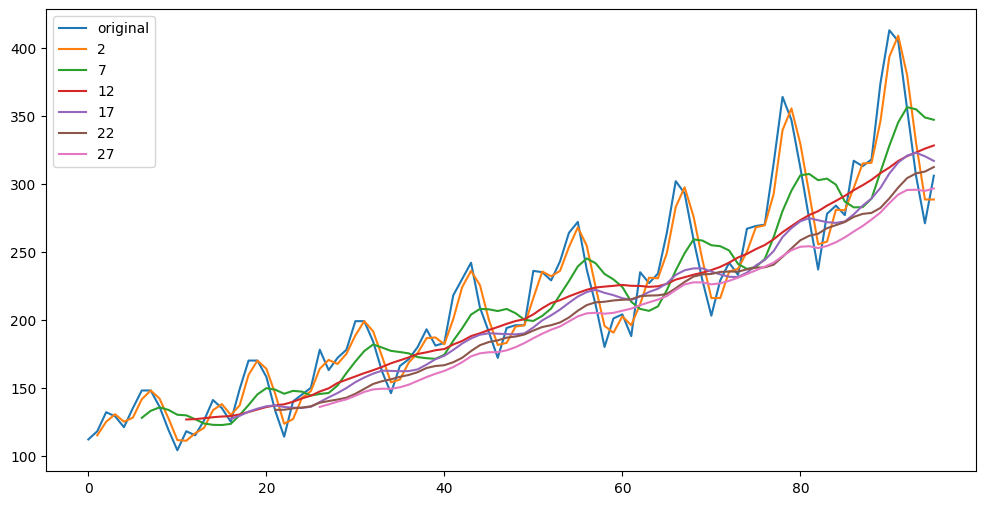

In [34]:
# moving the average
plt.figure(figsize=(12,6))
airlines['Passengers'].plot(label='original')
for i in range(2,30,5):
    airlines['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

In [80]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,Holt,ExponentialSmoothing

In [81]:
ses_model = SimpleExpSmoothing(train_data['Passengers']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start=test_data.index[0],end=test_data.index[-1])
ses_rmse = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_ses))**2))
ses_rmse

77.71310757781525

In [82]:
holt_model = Holt(train_data['Passengers']).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_holt = holt_model.predict(start=test_data.index[0],end=test_data.index[-1])
holt_rmse = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_holt))**2))
holt_rmse

42.88281154093843

In [83]:
hwe_model_m_a = ExponentialSmoothing(train_data["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_m_a = hwe_model_m_a.predict(start = test_data.index[0],end = test_data.index[-1])

hw_ma_rms=np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_hwe_m_a))**2))
hw_ma_rms

35.70600715333536

In [85]:
hwe_model_a_m = ExponentialSmoothing(train_data["Passengers"],seasonal="add",trend="mul",seasonal_periods=12).fit() 
pred_hwe_a_m = hwe_model_a_m.predict(start = test_data.index[0],end = test_data.index[-1])

hw_am_rms=np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_hwe_a_m))**2))
hw_am_rms

34.90983958321428

In [86]:
hwe_model_a_a = ExponentialSmoothing(train_data["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_a_a = hwe_model_a_a.predict(start = test_data.index[0],end = test_data.index[-1])

hw_aa_rms=np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_hwe_a_a))**2))
hw_aa_rms

40.85590566326478

In [110]:
#make a table containing accuracy score value for each value of k_neighbors
scores={'Smoothing Model':["Simple exponential smoothing model","Holt model","Holts winter exponential smoothing with multiplicative seasonality and additive trend","Holts winter exponential smoothing with additive seasonality and multiplicative trend","Holts winter exponential smoothing with additive seasonality and additive trend"],'RMSE_scores':[ses_rmse,holt_rmse,hw_ma_rms,hw_am_rms,hw_aa_rms]}
table2=pd.DataFrame(scores)
table2

,Smoothing Model,RMSE_scores
0,Simple exponential smoothing model,77.713108
1,Holt model,42.882812
2,Holts winter exponential smoothing with multiplicative seasonality and additive trend,35.706007
3,Holts winter exponential smoothing with additive seasonality and multiplicative trend,34.909840
4,Holts winter exponential smoothing with additive seasonality and additive trend,40.855906


In [89]:
# Holts winter exponential smoothing with additive seasonality and multiplicative trend	 hs the lowest scores

### ARIMA model

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

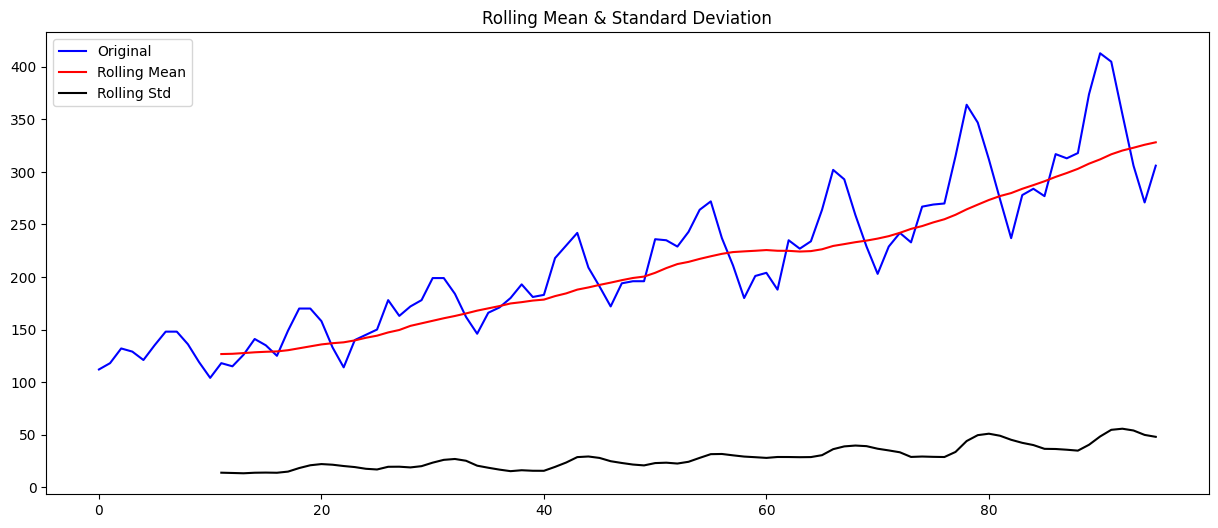

In [98]:
plt.figure(figsize=(15,6))
rollingmean=airlines['Passengers'].rolling(12).mean()
rollingstd=airlines['Passengers'].rolling(12).std()
plt.plot(airlines['Passengers'], color='blue',label='Original')
plt.plot(rollingmean, color='red', label='Rolling Mean')
plt.plot(rollingstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

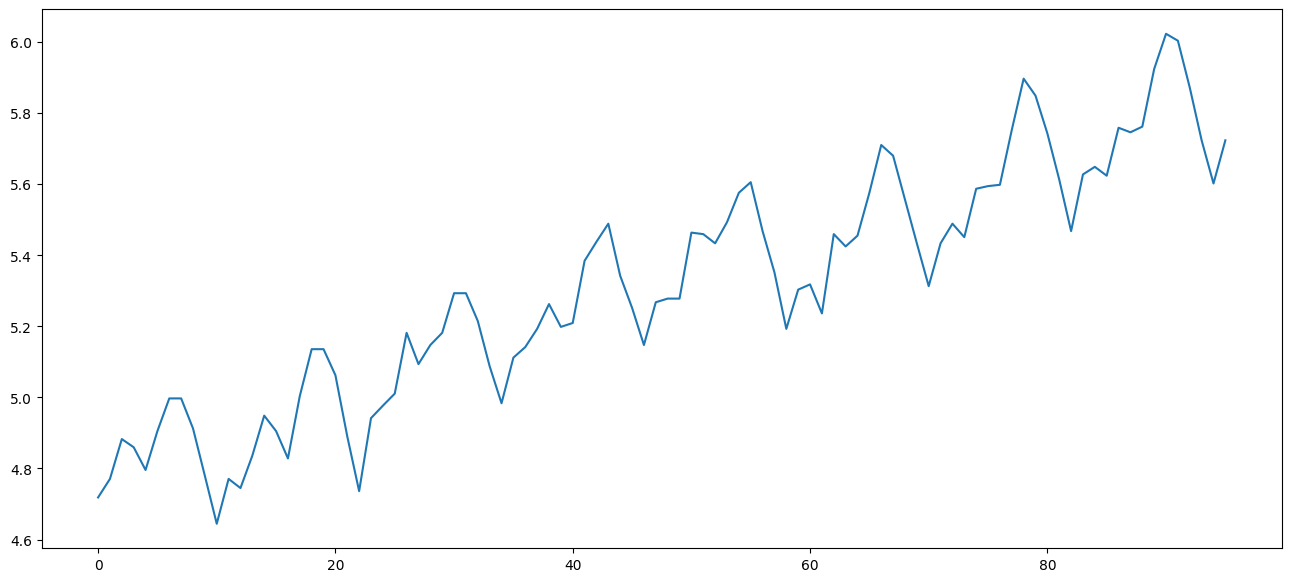

In [99]:
plt.figure(figsize=(16,7))
ts_log = np.log(airlines['Passengers'])
plt.plot(ts_log)

#### -differencing

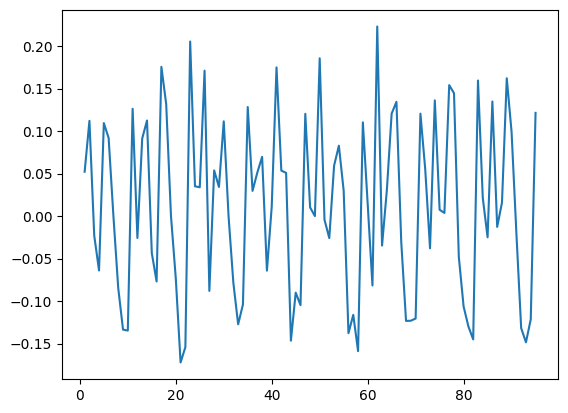

In [100]:
ts_log_diff = ts_log - ts_log.shift(periods=1)
plt.plot(ts_log_diff)

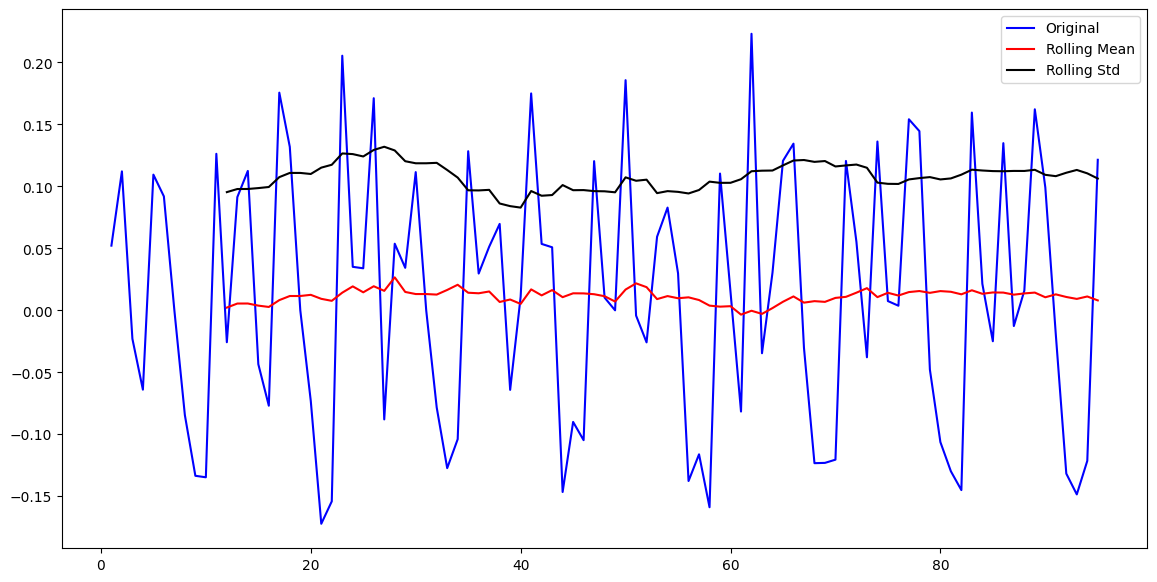

In [101]:
plt.figure(figsize=(14,7))
rollingmean = ts_log_diff.rolling(12).mean()
rollingstd = ts_log_diff.rolling(12).std()
plt.plot(ts_log_diff, color='blue',label='Original')
plt.plot(rollingmean, color='red', label='Rolling Mean')
plt.plot(rollingstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')

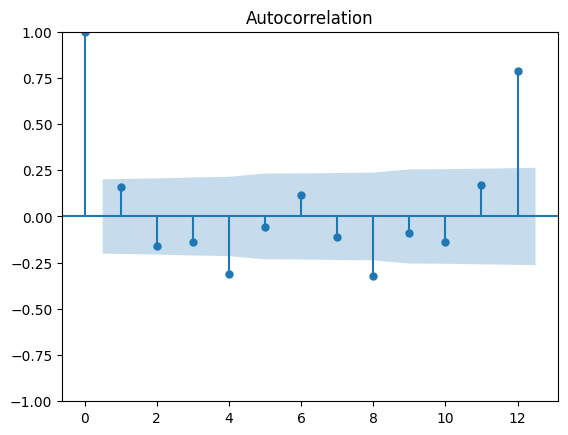

In [102]:
tsa_plots.plot_acf(ts_log_diff.dropna(),lags=12)
plt.show()

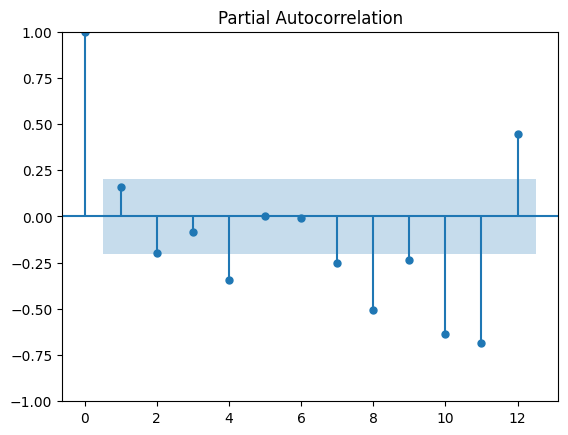

In [103]:
tsa_plots.plot_pacf(ts_log_diff.dropna(),lags=12)
plt.show()

In [104]:
import itertools
p =range(0,5)
d =range(0,5)
q =range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [107]:
for params in pdq:
    try:
        arima_model = ARIMA(airlines['Passengers'],order=params).fit()
        print(params,arima_model.aic)
    except:
        continue

In [ ]:
ARMA_model = ARMA(train_data['Passengers'],order=(3,0)).fit()
pred_arma = ARMA_model.predict(start = test_data.index[0],end = test_data.index[-1])

arma_rmse=np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_arma))**2))
arma_rmse

In [ ]:
ARIMA_model = ARIMA(train_data['Passengers'],order=(4,2,1)).fit()
pred_arima = ARIMA_model.predict(start = test_data.index[0],end = test_data.index[-1])

arima_rmse = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_arima))**2))
arima_rmse

In [ ]:
table = {'Model':pd.Series(['Linear','Exponential','Quadratic','Additive Seasonality','Add_Sea_Quadratic','Multiplicative Sea','Multplicative_Add_Sea','SES','Holt','HWE_Mul_Add','HWE_Add_Mul','HWE_Add_Add','ARMA','ARIMA']),
        'RMSE_values':pd.Series([rmse_linear,rmse_exponential,rmse_quadratic,rmse_additive_seasonality,rmse_additive_seasonality_quadratic,rmse_multiplicative_seasonality,rmse_multiplicative_add_sea,ses_rmse,holt_rmse,hw_ma_rms,hw_am_rms,hw_aa_rms,arma_rmse,arima_rmse])}
table3 = pd.DataFrame(table)
table3

,Model,RMSE_values
0,Linear,51.838097
1,Exponential,42.775260
2,Quadratic,54.031406
3,Additive Seasonality,123.027638
4,Add_Sea_Quadratic,36.536274
5,Multiplicative Sea,128.166228
6,Multplicative_Add_Sea,11.565825
7,SES,77.713108
8,Holt,42.882812
9,HWE_Mul_Add,35.707932


In [112]:
table1

,Forecasting Model,RMSE_scores
0,Linear,51.838097
1,Exponential,42.775260
2,Quadratic,54.031406
3,Additive Seasonality,123.027638
4,Additive Seasonality Quadratic,36.536274
5,Multiplicative Seasonality,128.166228
6,Multiplicative Additive Seasonality,11.565825


In [113]:
table2

,Smoothing Model,RMSE_scores
0,Simple exponential smoothing model,77.713108
1,Holt model,42.882812
2,Holts winter exponential smoothing with multiplicative seasonality and additive trend,35.706007
3,Holts winter exponential smoothing with additive seasonality and multiplicative trend,34.909840
4,Holts winter exponential smoothing with additive seasonality and additive trend,40.855906


In [114]:
""" so from the above three tables we can say that the best models are table1:"Multiplicative Additive Seasonality"
                                                                       table2:"Holts winter exponential smoothing with additive seasonality and multiplicative trend"
                                                                       table3:"ARMA model"" for this airlines dataset"""

' so from the above three tables we can say that the best models are table1:"Multiplicative Additive Seasonality"\n                                                                       table2:"Holts winter exponential smoothing with additive seasonality and multiplicative trend"\n                                                                       table3:"ARMA model"" for this airlines dataset'